# Missing value treatment (Using feature engineering)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import HTML
from sklearn.impute import KNNImputer
import random

# End of Distribution

In [2]:
data = pd.read_excel("sample.xlsx")

The Percenatge of Value Missing in Given Data is : 39.535%

The Percenatge of Value Missing  in each column of  Given Data is :
student_id     0.0
marks_10      30.0
marks_12      30.0
state         40.0
sex           35.0
salary        35.0
dtype: float64

Shape of dataframe (Rows, Columns):  (20, 6)

Data description :
        student_id   marks_10   marks_12        salary
count    20.00000  14.000000  14.000000     13.000000
mean     10.50000  60.285714  65.857143   9461.538462
std       5.91608  16.813129  15.634563    672.728848
min       1.00000  23.000000  45.000000   8500.000000
25%       5.75000  48.250000  53.750000   8500.000000
50%      10.50000  65.000000  65.000000   9800.000000
75%      15.25000  69.750000  75.000000  10000.000000
max      20.00000  89.000000  98.000000  10000.000000

 EOD  will only impute Numerical value

Following is the data available after Missing Value Treatment using END OF DISTRIBUTION
    student_id    marks_10    marks_12 state     sex        s

,student_id,marks_10,marks_12,state,sex,salary
0,1,55.000000,112.760832,NaN,Male,10000.000000
1,2,110.725102,78.000000,MH,Female,9800.000000
2,3,65.000000,98.000000,MH,NaN,11479.725005
3,4,23.000000,65.000000,MH,Male,11479.725005
4,5,89.000000,75.000000,MP,Male,10000.000000
5,6,45.000000,65.000000,GJ,NaN,11479.725005
6,7,110.725102,112.760832,GJ,Female,11479.725005
7,8,65.000000,65.000000,NaN,Female,9800.000000
8,9,110.725102,112.760832,NaN,Female,11479.725005
9,10,110.725102,112.760832,GJ,NaN,8500.000000



Empty rows  after imputing the data: 
 student_id    0
marks_10      0
marks_12      0
state         8
sex           7
salary        0
dtype: int64


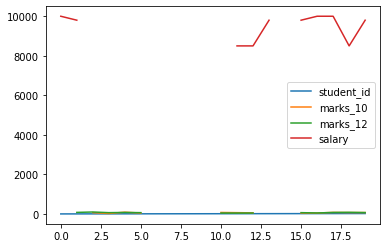

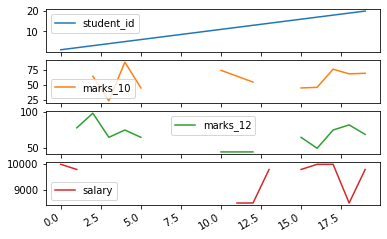

In [3]:
def quickinfo(df):
    num_col =list(data.select_dtypes(include='float64').columns)
    print("The Percenatge of Value Missing in Given Data is : {:.3f}%".format((df.isna().sum().sum())/(df.count().sum())*100))
    print("\nThe Percenatge of Value Missing  in each column of  Given Data is :\n{}".format((df.isnull().sum()*100)/df.shape[0]))
    print('')
    print('Shape of dataframe (Rows, Columns): ',df.shape) # df.shape returns number of row,number of columns in form of tuple for the imported dataset 
    print('')
    print('Data description :\n',df.describe()) # df.describe displays complete description of "df", which consist of count,mean, standard deviation,minimum value, maximum value, 25th - 50th - 75th percentile values of respective numerical columns of given dataset
quickinfo(data)

def plot(df):
    df.plot.line(subplots = False) # it will show line plot of overall numerical data in a single display.
    df.plot.line(subplots = True) # it will show individual plot for each of the column in imported dataset
plot(data)
def EOD(df):
    print('')
    print(" EOD  will only impute Numerical values")
    print('')
    print('Following is the data available after Missing Value Treatment using END OF DISTRIBUTION')
    extreme =data.mean()+data.std()*3 #Extreme will calculate the 3rd standard devation value added with mean of that column to give extreme value for all numerical column.
    clean_df= df.fillna(extreme)# End of distribution process will treat only numerical columns.
    print(clean_df)
    clean_df1=clean_df.head(10) # ".head(10)" shows the first 10 rows of the treated dataset i.e, clean_df .
    display(HTML(clean_df1.to_html())) #display - When this object is returned by an expression or passed to the display function, it will result in the data being displayed in the frontend.
    print("\nEmpty rows  after imputing the data: \n", clean_df.isnull().sum())
EOD(data)

#This method is similar to the arbitrary value method, 
#however, the arbitrary value here is chosen at the tail-end of the underlying distribution of the variable.
# only numerical data can be processed in end of distribution method.

# Capturing NaN with New Feature

In [4]:
data = pd.read_excel("sample.xlsx")

The Percenatge of Value Missing in Given Data is : 39.53%

Data to be treated using Capture NaN values with new features : ['student_id', 'marks_10', 'marks_12', 'state', 'sex', 'salary']

Shape of dataframe (Rows, Columns):  (20, 6)

Data description :         student_id   marks_10   marks_12        salary
count    20.00000  14.000000  14.000000     13.000000
mean     10.50000  60.285714  65.857143   9461.538462
std       5.91608  16.813129  15.634563    672.728848
min       1.00000  23.000000  45.000000   8500.000000
25%       5.75000  48.250000  53.750000   8500.000000
50%      10.50000  65.000000  65.000000   9800.000000
75%      15.25000  69.750000  75.000000  10000.000000
max      20.00000  89.000000  98.000000  10000.000000

Using NaN Value Replacement Method 


,student_id,marks_10,marks_12,state,sex,salary,student_id_NaN,marks_10_NaN,marks_12_NaN,state_NaN,sex_NaN,salary_NaN
0,1,55.0,65.0,MH,Male,10000.0,0,0,1,1,0,0
1,2,65.0,78.0,MH,Female,9800.0,0,1,0,0,0,0
2,3,65.0,98.0,MH,Female,9800.0,0,0,0,0,1,1
3,4,23.0,65.0,MH,Male,9800.0,0,0,0,0,0,1
4,5,89.0,75.0,MP,Male,10000.0,0,0,0,0,0,0
5,6,45.0,65.0,GJ,Female,9800.0,0,0,0,0,1,1
6,7,65.0,65.0,GJ,Female,9800.0,0,1,1,0,0,1
7,8,65.0,65.0,MH,Female,9800.0,0,0,0,1,0,0
8,9,65.0,65.0,MH,Female,9800.0,0,1,1,1,0,1
9,10,65.0,65.0,GJ,Female,8500.0,0,1,1,0,1,0


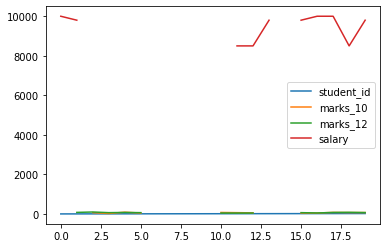

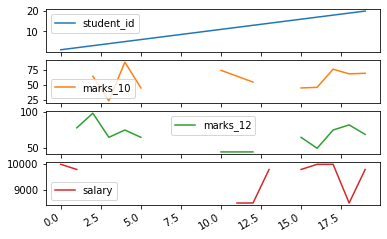

In [5]:
def quickinfo(df):
    num_col =list(data.select_dtypes(include='float64').columns)
    print("The Percenatge of Value Missing in Given Data is : {:.2f}%".format(((df.isna().sum().sum())/(df.count().sum())*100)))
    print('')
    print("Data to be treated using Capture NaN values with new features : {}".format(list(data.columns))) # it shows the number of feature available to be proccessed.
    print('')
    print('Shape of dataframe (Rows, Columns): ',df.shape) # df.shape returns number of row,number of columns in form of tuple for the imported dataset 
    print('')
    print('Data description : ',df.describe()) # df.describe displays complete description of "df", which consist of count,mean, standard deviation,minimum value, maximum value, 25th - 50th - 75th percentile values of respective numerical columns of given dataset
    print('')
    print("Using NaN Value Replacement Method ")
    clean_df=data.head(10)
    #display(HTML(clean_df.to_html()))
quickinfo(data)

def plot(df):
    df.plot.line(subplots = False)
    df.plot.line(subplots = True)
plot(data)

def capturenan(df):
    
    #copies of dataframes
    df1 = df.copy()
    df2 = df.copy()
    
    #  --CONVERSION & CREATION OF NEW FEATURE--
    # here the code runs in such a way that in each column/feature if there is any null value then the code returns '1'
    # if there is non-null then it returns '0'.
    # all this work is done by creating new feature with a suffix of '_NaN'
    total_column=dict((data.dtypes))
    for i in total_column:
        df1[i]=np.where(df[i].isnull(),1,0) 
    df1=df1.add_suffix('_NaN')
  
    
    # --IMPUTATION --
    # here on the numerical missing data is being imputed by the median of respt.feature
    # as well the categorical data in imputed using mode. 
    # why median ? --> the median value doesn't depend on all the values in the dataset. Consequently, when some of the values are more extreme, the effect on the median is smaller. When you have a skewed distribution, the median is a better measure of central tendency than the mean.
    clean_df=(df2.fillna(df2.median()))
    clean_df.fillna(clean_df.select_dtypes(include='object').mode().iloc[0], inplace=True)
    total_column_mode=dict((clean_df.dtypes))
    for i in total_column_mode:
        clean_df[i].fillna(clean_df[i].mode(), inplace=True)
    
    # --final output--
    # here dataframe 'df1' is the dataframe which shows newly-featured data with suffix '_NaN'
    # clean_df is the dataframe or original dataframe where the the null are replaced with values using median and mode.
    # here two different dataframes ere created one is original and another one is the featured. 
    # both the dataframe is to be displayed as a single dataframe 
    # so, here both dataframes are concatenated along the columns (axis=1)
    frames = [clean_df, df1]
    result = pd.concat(frames, axis=1)
    clean_df2=result.head(10)
    display(HTML(clean_df2.to_html()))

capturenan(data)


# Frequent Category Imputation

In [2]:
df = pd.read_excel('sample.xlsx')

The Percenatge of Value Missing in Given Data is : 39.53%

The Categorical Data we have : ['state', 'sex']

Shape of dataframe (Rows, Columns):  (20, 6)

Data description :         student_id   marks_10   marks_12        salary
count    20.00000  14.000000  14.000000     13.000000
mean     10.50000  60.285714  65.857143   9461.538462
std       5.91608  16.813129  15.634563    672.728848
min       1.00000  23.000000  45.000000   8500.000000
25%       5.75000  48.250000  53.750000   8500.000000
50%      10.50000  65.000000  65.000000   9800.000000
75%      15.25000  69.750000  75.000000  10000.000000
max      20.00000  89.000000  98.000000  10000.000000

Only categorical missing values can be treated using Frequent Categorical Imputation method
Following is the data available after Frequent Categorical Imputation


,student_id,marks_10,marks_12,state,sex,salary
0,1,55.0,NaN,MH,Male,10000.0
1,2,NaN,78.0,MH,Female,9800.0
2,3,65.0,98.0,MH,Female,NaN
3,4,23.0,65.0,MH,Male,NaN
4,5,89.0,75.0,MP,Male,10000.0
5,6,45.0,65.0,GJ,Female,NaN
6,7,NaN,NaN,GJ,Female,NaN
7,8,65.0,65.0,MH,Female,9800.0
8,9,NaN,NaN,MH,Female,NaN
9,10,NaN,NaN,GJ,Female,8500.0



Empty rows  after imputing the data: 
 student_id    0
marks_10      4
marks_12      4
state         0
sex           0
salary        5
dtype: int64
Following line plot shows available and missing data in given dataset 


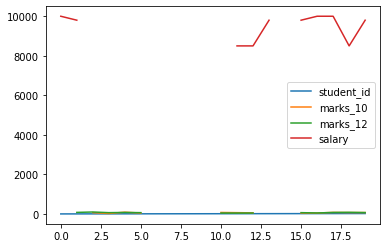

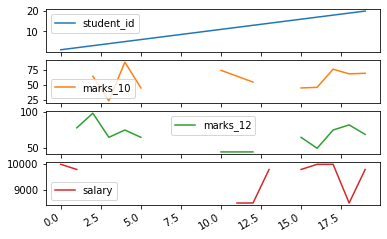

In [3]:
def quickinfo(df):
    print("The Percenatge of Value Missing in Given Data is : {:.2f}%".format(((df.isna().sum().sum())/(df.count().sum())*100))) #calculate null percentages
    print('')# the above cose will show null %, as it add all null values from all columns and divided by sum of total data in the given dataset.
    total_column=dict((df.dtypes))
    total_column_set=set(total_column.keys())
    numerical_column_set=set(dict(df.median()).keys())
    categorical_column=list(total_column_set-numerical_column_set)
    print("The Categorical Data we have :",categorical_column)
    print('')
    print('Shape of dataframe (Rows, Columns): ',df.shape) # df.shape returns number of row,number of columns in form of tuple for the imported dataset 
    print('')
    print('Data description : ',df.describe()) # df.describe displays complete description of "df", which consist of count,mean, standard deviation,minimum value, maximum value, 25th - 50th - 75th percentile values of respective numerical columns of given dataset
    print('')
    print("Only categorical missing values can be treated using Frequent Categorical Imputation method")
quickinfo(df)

def impute_nan(df,variable): # function for frequency categorical imputation
    most_frequent_category=df[variable].value_counts().index[0] # here we find the most frequent value of the variable
    df[variable].fillna(most_frequent_category,inplace=True) # And here we replace the null variable with the most frequent value or we can say with most frequent categories
    
categorical_column=(list(dict(df.select_dtypes(include='object').mode()))) # Initializing the categorical data  
for feature in categorical_column:
    impute_nan(df,feature) #impute all categorical data column wise. 
print('Following is the data available after Frequent Categorical Imputation') 
clean_df1=df.head(10) # showing dataset after imputation
display(HTML(clean_df1.to_html())) #display - When this object is returned by an expression or passed to the display function, it will result in the data being displayed in the frontend.
print("\nEmpty rows  after imputing the data: \n", clean_df1.isnull().sum()) #showing null values after imputation
    
def plot(df): # function for ploting df missing value 
    print("Following line plot shows available and missing data in given dataset ")
    df.plot.line(subplots = False) #it shows complete data visualization in one plot 
    df.plot.line(subplots = True) # data is vizualized seperatly of all numerical columns. 
    
plot(df)   


# Arbitrary missing value imputation 

In [85]:
df=pd.read_excel('sample.xlsx')

The Percenatge of Value Missing in Given Data is : 39.53%


The numerical data we have:  ['student_id', 'marks_10', 'marks_12', 'salary']
The Categorical Data we have:  ['sex', 'state']
Most frequent category occurances w.r.t  ['sex', 'state'] : ['Female', 'MH']

Shape of dataframe (Rows, Columns):  (20, 6)

Data description :         student_id   marks_10   marks_12        salary
count    20.00000  14.000000  14.000000     13.000000
mean     10.50000  60.285714  65.857143   9461.538462
std       5.91608  16.813129  15.634563    672.728848
min       1.00000  23.000000  45.000000   8500.000000
25%       5.75000  48.250000  53.750000   8500.000000
50%      10.50000  65.000000  65.000000   9800.000000
75%      15.25000  69.750000  75.000000  10000.000000
max      20.00000  89.000000  98.000000  10000.000000

missing values will be treated using arbitrary value

Hey user please use MIN or MAX value from data decription as Arbitrary Value for respective feature
please use above given most f

,student_id,marks_10,marks_12,state,sex,salary
0,1,55,NaN,NaN,Male,10000.0
1,2,23,78.0,MH,Female,9800.0
2,3,65,98.0,MH,NaN,NaN
3,4,23,65.0,MH,Male,NaN
4,5,89,75.0,MP,Male,10000.0
5,6,45,65.0,GJ,NaN,NaN
6,7,23,NaN,GJ,Female,NaN
7,8,65,65.0,NaN,Female,9800.0
8,9,23,NaN,NaN,Female,NaN
9,10,23,NaN,GJ,NaN,8500.0



Empty rows  after imputing the data: 
 student_id    0
marks_10      0
marks_12      4
state         3
sex           3
salary        5
dtype: int64


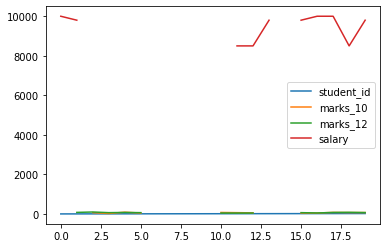

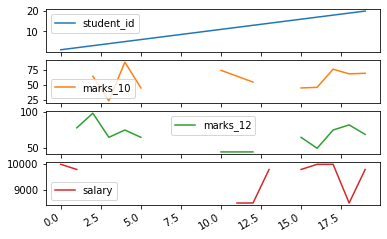

In [86]:
def quickinfo(df):

    print("The Percenatge of Value Missing in Given Data is : {:.2f}%".format(((df.isna().sum().sum())/(df.count().sum())*100)))
    print('')# the above cose will show null %, as it add all null values from all columns and divided by sum of total data in the given dataset.
    total_column=dict((df.dtypes))
    total_column_set=set(total_column.keys())
    numerical_column_set=set(dict(df.median()).keys())
    categorical_column=list(total_column_set-numerical_column_set)
    print('')
    print("The numerical data we have: ",list(dict(df.median()).keys())) # here we directly get the list of numerical feature (df.median directly choose numerical data)
    print("The Categorical Data we have: ",categorical_column) # making a difference between total_column_set and numerical_column_set we get categorical_column as a list.
    occurance = list(df.value_counts(subset=categorical_column, sort=False,normalize=False).idxmax())
    print('Most frequent category occurances w.r.t ', categorical_column ,':', occurance)
    print('')
    print('Shape of dataframe (Rows, Columns): ',df.shape) # df.shape returns number of row,number of columns in form of tuple for the imported dataset 
    print('')
    print('Data description : ',df.describe()) # df.describe displays complete description of "df", which consist of count,mean, standard deviation,minimum value, maximum value, 25th - 50th - 75th percentile values of respective numerical columns of given dataset
    print('')
    print("missing values will be treated using arbitrary value")
    print('')
    print("Hey user please use MIN or MAX value from data decription as Arbitrary Value for respective feature")
    print("please use above given most frequent category occurances to impute categorical features")
    print('')
quickinfo(df)

def plot(df):
    # Following line plot shows missing data in given dataset
    df.plot.line(subplots = False) # it will show line plot of overall numerical data in one screen.
    df.plot.line(subplots = True)  # it show show individual plots for each oh the numerical column.
plot(df)

def impute_nan(df,variable,arbitrary_value):
    df[variable]=df[variable].fillna(arbitrary_value) #here the respective column of the dataframe is directly replaced by the arbitrary value imputed by USER 
    print(df)
    clean_df1=df.head(10)
    display(HTML(clean_df1.to_html()))  #display - When this object is returned by an expression or passed to the display function, it will result in the data being displayed in the frontend.
    print("\nEmpty rows  after imputing the data: \n", clean_df1.isnull().sum()) # clean_df1.isnull().sum() shows total number of missing values in respective columns.
    #return df    ### for continuous imputation we can also use "return df"
impute_nan(df,variable=(input("enter the column which you want to fill: "))
           ,arbitrary_value=(input('enter the arbitrary_value: ')))

#Here, the purpose is to flag missing values in the data set. 
#You would impute the missing data with a fixed arbitrary value (a random value).
#It is mostly used for categorical variables, 
#but can also be used for numeric variables with arbitrary values such as 0, 999 or other similar combinations of numbers.

# Some important points -->
#1 user should always select LAST or the LEAST outlier value to impute in respective feature. 
   #as we want the value that is completely on the end of the particuler outlier. it may be on the least outlier and maybe on the max outlier
#2 best way is to check data description where we are given with min and max value in each feature(numerical).
#3 user needs to enter feature name and arbitrary value to be imputed(pls check min or max value from data description table)
#4 for categorical data most frequent values should be used for imputation. 


# RANDOM SAMPLE IMPUTATION 

In [42]:
df=pd.read_excel('sample.xlsx')

The Percenatge of Value Missing in Given Data is : 39.535%

Data to be imputed using Random Sample Imputation : ['student_id', 'marks_10', 'marks_12', 'state', 'sex', 'salary']

Shape of dataframe (Rows, Columns):  (20, 6)

Data description :
        student_id   marks_10   marks_12        salary
count    20.00000  14.000000  14.000000     13.000000
mean     10.50000  60.285714  65.857143   9461.538462
std       5.91608  16.813129  15.634563    672.728848
min       1.00000  23.000000  45.000000   8500.000000
25%       5.75000  48.250000  53.750000   8500.000000
50%      10.50000  65.000000  65.000000   9800.000000
75%      15.25000  69.750000  75.000000  10000.000000
max      20.00000  89.000000  98.000000  10000.000000

Dataframe after random sample imputation


C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,student_id,marks_10,marks_12,state,sex,salary
0,1,55.0,98.0,GJ,Male,10000.0
1,2,45.0,78.0,MH,Female,9800.0
2,3,65.0,98.0,MH,Female,9800.0
3,4,23.0,65.0,MH,Male,8500.0
4,5,89.0,75.0,MP,Male,10000.0
5,6,45.0,65.0,GJ,Male,8500.0
6,7,69.0,69.0,GJ,Female,8500.0
7,8,65.0,65.0,GJ,Female,9800.0
8,9,45.0,45.0,MH,Female,8500.0
9,10,45.0,82.0,GJ,Male,8500.0



Empty rows  after imputing the data: 
 student_id    0
marks_10      0
marks_12      0
state         0
sex           0
salary        0
dtype: int64


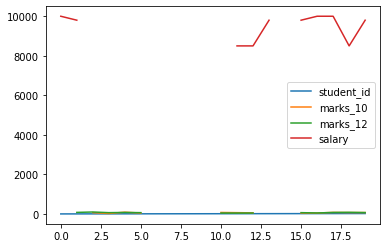

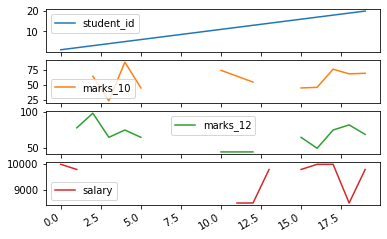

In [43]:
def quickinfo(df):
    print("The Percenatge of Value Missing in Given Data is : {:.3f}%".format((df.isna().sum().sum())/(df.count().sum())*100))
    print('')
    print("Data to be imputed using Random Sample Imputation :",list(df.columns)) # it returns list of all feature names in given dataset,as every feature will be imputed by random values of respt. feature
    print('')
    print('Shape of dataframe (Rows, Columns): ',df.shape) # df.shape returns number of row,number of columns in form of tuple for the imported dataset 
    print('')
    print('Data description :\n',df.describe()) # df.describe displays complete description of "df", which consist of count,mean, standard deviation,minimum value, maximum value, 25th - 50th - 75th percentile values of respective numerical columns of given dataset
quickinfo(df)

def plot(df):
    # Following line plot shows missing data in given dataset
    df.plot.line(subplots = False) # it will show line plot of overall numerical data in one screen.
    df.plot.line(subplots = True)  # it show show individual plots for each oh the numerical column.
plot(df)

def randomsampleimputation(df):  #  mask=nulls,
    for col in df.columns:
        data = df[col]
        nulls = data.isnull() #isnull detects missing values in the given series object,missing values gets map to True and non-missing value gets mapped to False
        samples = random.choices( data[~nulls].values , k = nulls.sum() ) #random.choice() function returns a random element from the non-empty sequence, k defines the lenght of returned list
        data[nulls] = samples
    print('')
    print("Dataframe after random sample imputation")
    display(HTML(df.to_html())) #display - When this object is returned by an expression or passed to the display function, it will result in the data being displayed in the frontend.
    print("\nEmpty rows  after imputing the data: \n",df.isnull().sum()) # clean_df1.isnull().sum() shows total number of missing values in respective columns.

randomsampleimputation(df)

# --THE END--